<a href="https://colab.research.google.com/github/Offliners/NTUME-Introduction-to-Robotics/blob/main/Exp2/DHTable_tester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **匯入函示庫**

In [ ]:
import numpy as np # 計算矩陣用

%matplotlib inline
import matplotlib.pyplot as plt # 繪製3D簡易機械手臂用

## **建立Craig版本的Transformation Matrix**

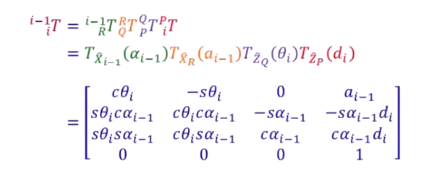

In [ ]:
def craig_DH2TF(arg):
  tf = np.array([
      [1, 0, 0, 0],
      [0, 1, 0, 0],
      [0, 0, 1, 0],
      [0, 0, 0, 1]
  ], dtype=np.float64)
  for line in arg:
    theta = line[0] # Theta_i
    alpha = line[1] # Alpha_(i-1)
    a = line[2]     # a_(i-1)
    d = line[3]     # d_i
    tf = np.dot(tf, np.array([
        [np.cos(theta)              , -np.sin(theta)             , 0             , a               ],
        [np.sin(theta)*np.cos(alpha), np.cos(theta)*np.cos(alpha), -np.sin(alpha), -np.sin(alpha)*d],
        [np.sin(theta)*np.sin(alpha), np.cos(theta)*np.sin(alpha), np.cos(alpha) , np.cos(alpha)*d ],
        [0                          , 0                          , 0             , 1               ]
    ], dtype=np.float64))

  return tf

## **建立Standard版本的Transformation Matrix**

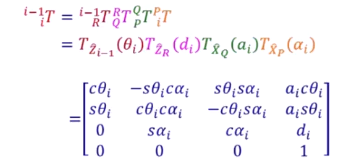

In [ ]:
def std_DH2TF(arg):
  tf = np.array([
      [1, 0, 0, 0],
      [0, 1, 0, 0],
      [0, 0, 1, 0],
      [0, 0, 0, 1]
  ], dtype=np.float64)
  for line in arg:
    theta = line[0] # Theta_i
    alpha = line[1] # Alpha_i
    a = line[2]     # a_i
    d = line[3]     # d_i
    tf = np.dot(tf, np.array([
        [np.cos(theta), -np.sin(theta)*np.cos(alpha), np.sin(theta)*np.sin(alpha) , a*np.cos(theta)],
        [np.sin(theta), np.cos(theta)*np.cos(alpha) , -np.cos(theta)*np.sin(alpha), a*np.sin(theta)],
        [0            , np.sin(alpha)               , np.cos(alpha)               , d              ],
        [0            , 0                           , 0                           , 1              ]
    ], dtype=np.float64))
    
  return tf

## **繪製簡易3D機械手臂的函式**

In [ ]:
def plotRobotArm(arg, method='std', base_point=None, Craig_endPoint=None):
  fig = plt.figure()
  ax = plt.axes(projection='3d')
  z = np.linspace(0, base_point[2], 1000)
  y = np.linspace(0, base_point[1], 1000)
  x = np.linspace(0, base_point[0], 1000)
  ax.plot3D(x, y, z, 'red')
  point = np.array([0, 0, 0, 1])
  tf = np.array([
      [1, 0, 0, 0],
      [0, 1, 0, 0],
      [0, 0, 1, 0],
      [0, 0, 0, 1]
  ], dtype=np.float64)
  for i in range(len(arg)):
    theta = arg[i][0] # Theta_i
    alpha = arg[i][1] # Alpha_i
    a = arg[i][2]     # a_i
    d = arg[i][3]     # d_i

    temp = point
    if i == len(arg) - 1 and method == 'craig':
      point = Craig_endPoint
    else:
      point = np.array([0, 0, 0, 1])
 
    if method == 'std':
      tf = np.dot(tf, np.array([
        [np.cos(theta), -np.sin(theta)*np.cos(alpha), np.sin(theta)*np.sin(alpha) , a*np.cos(theta)],
        [np.sin(theta), np.cos(theta)*np.cos(alpha) , -np.cos(theta)*np.sin(alpha), a*np.sin(theta)],
        [0            , np.sin(alpha)               , np.cos(alpha)               , d              ],
        [0            , 0                           , 0                           , 1              ]
      ], dtype=np.float64))
      point = np.dot(tf, point.T)
    elif method == 'craig':
      tf = np.dot(tf, np.array([
        [np.cos(theta)              , -np.sin(theta)             , 0             , a               ],
        [np.sin(theta)*np.cos(alpha), np.cos(theta)*np.cos(alpha), -np.sin(alpha), -np.sin(alpha)*d],
        [np.sin(theta)*np.sin(alpha), np.cos(theta)*np.sin(alpha), np.cos(alpha) , np.cos(alpha)*d ],
        [0                          , 0                          , 0             , 1               ]
      ], dtype=np.float64))
      point = np.dot(tf, point.T)
    else:
      print('Unknown Method')
      break
  
    z = np.linspace(temp[2], point[2], 1000)
    y = np.linspace(temp[1], point[1], 1000)
    x = np.linspace(temp[0], point[0], 1000)
    ax.plot3D(x, y, z, 'gray')

  ax.scatter3D(point[0], point[1], point[2], 'blue')
  ax.set_title(f'Method : {method}')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  print(f'Metohd : {method}  End Point : ({point[0]}, {point[1]}, {point[2]})')

# **Q1**

透過隨機亂數給 $\theta_1, \theta_2, \theta_3$ 與 $d_4$
建立測試資料(設定10000筆)來比較Craig與Standard兩種方法的末端點在Reference frame表示是否相同

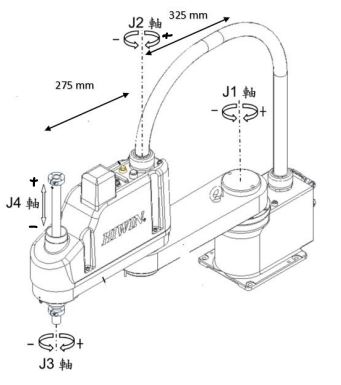

In [ ]:
times = 10000 # 測10000次
for i in range(times):
  np.random.seed(i) # 每次實驗都會更換random seed確保隨機性
  theta_1 = np.random.randint(180) # 隨機從0~179取亂數
  theta_2 = np.random.randint(180)
  theta_3 = np.random.randint(180)
  d_4 = np.random.randint(1000) # # 隨機從0~999取亂數

  # DH Table (Standard Method)
  dh_table_std = np.array([
      [np.radians(-theta_1), 0, 325, 0        ],
      [np.radians(-theta_2), 0, 275, 77       ],
      [np.radians(-theta_3), 0, 0  , 0        ],
      [0                   , 0, 0  , -90 + d_4]
  ], dtype=np.float64)

  P_4_std = np.array([0, 0, 0, 1]) # 末端Frame原點座標
  tf_std = np.dot(std_DH2TF(dh_table_std), P_4_std.T)

  # DH Table (Craig Method)
  dh_table_craig = np.array([
      [np.radians(-theta_1), 0, 0  , 0  ],
      [np.radians(-theta_2), 0, 325, 0  ],
      [np.radians(-theta_3), 0, 275, 77 ],
      [0                   , 0, 0  , d_4]
  ], dtype=np.float64)

  P_4_craig = np.array([0, 0, -90, 1]) # 末端Frame工具座標
  tf_craig = np.dot(craig_DH2TF(dh_table_craig), P_4_craig.T)

  if np.allclose(tf_std, tf_craig): # 小於此誤差算對 : rtol=1e-05, atol=1e-08
    flag = 0
  else:
    flag = 1
    print('Oops')
    break

if flag == 0:
  print('All OK') # 全對
else:
  print('There is something wrong!') # 有錯

All OK


## **繪製簡易3D的SCARA**

Theta_1=109°, Theta_2=54°, Theta_3=92°, d_4=933mm
Metohd : std  End Point : (-368.79345808841066, -387.69575586853057, 920.0)
Metohd : craig  End Point : (-368.7934580884107, -387.6957558685306, 920.0)


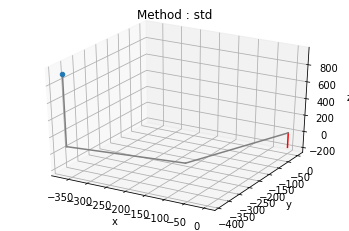

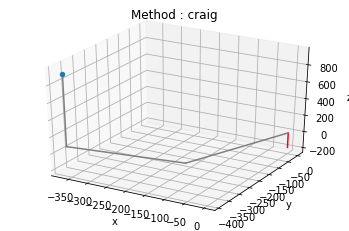

In [ ]:
theta_1 = np.random.randint(180)
theta_2 = np.random.randint(180)
theta_3 = np.random.randint(180)
d_4 = np.random.randint(1000)
base_point = [0, 0, -180]

print(f'Theta_1={theta_1}°, Theta_2={theta_2}°, Theta_3={theta_3}°, d_4={d_4}mm')

dh_table_std = np.array([
      [np.radians(-theta_1), 0, 325, 0        ],
      [np.radians(-theta_2), 0, 275, 77       ],
      [np.radians(-theta_3), 0, 0  , 0        ],
      [0                   , 0, 0  , -90 + d_4]
], dtype=np.float64)
plotRobotArm(dh_table_std, 'std', base_point)

dh_table_craig = np.array([
      [np.radians(-theta_1), 0, 0  , 0  ],
      [np.radians(-theta_2), 0, 325, 0  ],
      [np.radians(-theta_3), 0, 275, 77 ],
      [0                   , 0, 0  , d_4]
], dtype=np.float64)
plotRobotArm(dh_table_craig, 'craig', base_point, np.array([0, 0, -90, 1]))

# **Q2**

透過隨機亂數給 $\theta_1, \theta_2, \theta_3, \theta_4, \theta_5, \theta_6$
建立測試資料(設定10000筆)來比較Craig與Standard兩種方法的末端點在Reference frame表示是否相同

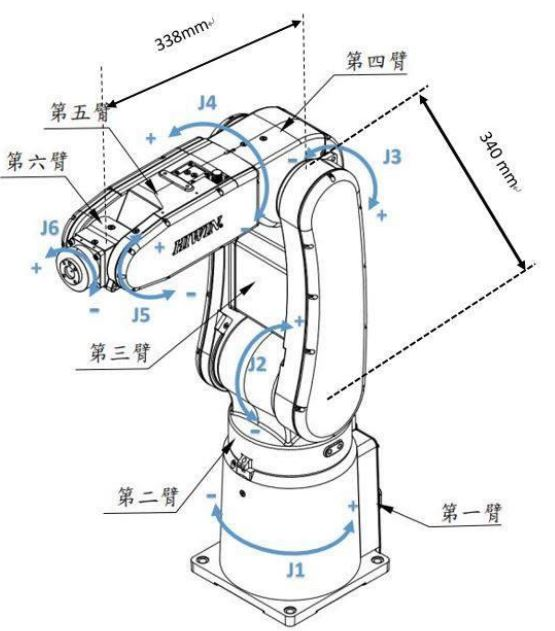

In [ ]:
times = 10000
flag = 0
count = 0
for i in range(times):
  np.random.seed(i)
  theta_1 = np.random.randint(180)
  theta_2 = np.random.randint(180)
  theta_3 = np.random.randint(180)
  theta_4 = np.random.randint(180)
  theta_5 = np.random.randint(180)
  theta_6 = np.random.randint(180)

  # DH Table (Standard Method)
  dh_table_std = np.array([
      [np.radians(theta_1)     , np.radians(90) , 0  , 0  ],
      [np.radians(theta_2 + 90), 0              , 340, 0  ],
      [np.radians(theta_3)     , np.radians(90) , 0  , 0  ],
      [np.radians(theta_4)     , np.radians(-90), 0  , 338],
      [np.radians(theta_5)     , np.radians(90) , 0  , 0  ],
      [np.radians(theta_6)     , 0              , 0  , 0  ]
  ], dtype=np.float64)

  P_4_std = np.array([0, 0, 0, 1])
  tf_std = np.dot(std_DH2TF(dh_table_std), P_4_std.T)

  # DH Table (Craig Method)
  dh_table_craig = np.array([
      [np.radians(theta_1)      , 0              , 0  , 0  ],
      [np.radians(theta_2 + 90) , np.radians(90) , 0  , 0  ],
      [np.radians(theta_3)      , 0              , 340, 0  ],
      [np.radians(theta_4)      , np.radians(90) , 0  , 338],
      [np.radians(theta_5)      , np.radians(-90), 0  , 0  ],
      [np.radians(theta_6)      , np.radians(90) , 0  , 0  ]
  ], dtype=np.float64)

  P_4_craig = np.array([0, 0, 0, 1])
  tf_craig = np.dot(craig_DH2TF(dh_table_craig), P_4_craig.T)

  if np.allclose(tf_std, tf_craig): # 小於此誤差算對 : rtol=1e-05, atol=1e-08
    pass
  else:
    flag = 1
    print('Oops')
    break

if flag == 0:
  print('All OK')
else:
  print('There is something wrong!')

All OK


## **繪製簡易3D的上銀六軸(無加裝工具在第六軸)**

Theta_1=92°, Theta_2=165°, Theta_3=153°, Theta_4=123°, Theta_5=24°, Theta_6=16°
Metohd : std  End Point : (-5.6950560707713835, 163.08506810301708, -554.5809258875772)
Metohd : craig  End Point : (-5.695056070771381, 163.08506810301708, -554.5809258875772)


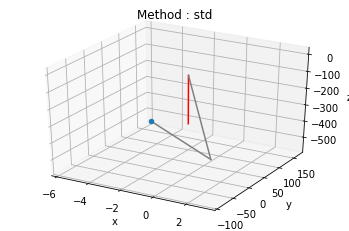

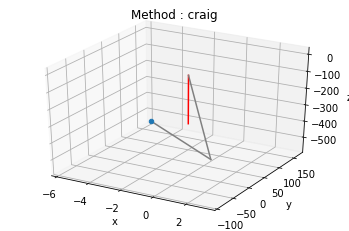

In [ ]:
theta_1 = np.random.randint(180)
theta_2 = np.random.randint(180)
theta_3 = np.random.randint(180)
theta_4 = np.random.randint(180)
theta_5 = np.random.randint(180)
theta_6 = np.random.randint(180)
base_point = [0, 0, -280]

print(f'Theta_1={theta_1}°, Theta_2={theta_2}°, Theta_3={theta_3}°, Theta_4={theta_4}°, Theta_5={theta_5}°, Theta_6={theta_6}°')

dh_table_std = np.array([
  [np.radians(theta_1)     , np.radians(90) , 0  , 0  ],
  [np.radians(theta_2 + 90), 0              , 340, 0  ],
  [np.radians(theta_3)     , np.radians(90) , 0  , 0  ],
  [np.radians(theta_4)     , np.radians(-90), 0  , 338],
  [np.radians(theta_5)     , np.radians(90) , 0  , 0  ],
  [np.radians(theta_6)     , 0              , 0  , 0  ]
], dtype=np.float64)
plotRobotArm(dh_table_std, 'std', base_point)

dh_table_craig = np.array([
    [np.radians(theta_1)      , 0              , 0  , 0  ],
    [np.radians(theta_2 + 90) , np.radians(90) , 0  , 0  ],
    [np.radians(theta_3)      , 0              , 340, 0  ],
    [np.radians(theta_4)      , np.radians(90) , 0  , 338],
    [np.radians(theta_5)      , np.radians(-90), 0  , 0  ],
    [np.radians(theta_6)      , np.radians(90) , 0  , 0  ]
], dtype=np.float64)
plotRobotArm(dh_table_craig, 'craig', base_point, np.array([0, 0, 0, 1]))

## **繪製簡易3D的上銀六軸(有加裝工具在第六軸)**

Theta_1=122°, Theta_2=76°, Theta_3=161°, Theta_4=174°, Theta_5=69°, Theta_6=179°
Metohd : std  End Point : (332.25480257680545, -513.303626403989, -180.70458046691488)
Metohd : craig  End Point : (332.25480257680545, -513.303626403989, -180.70458046691488)


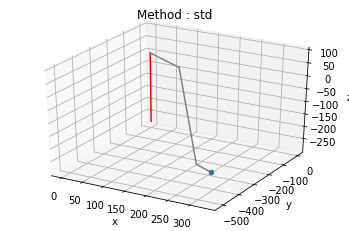

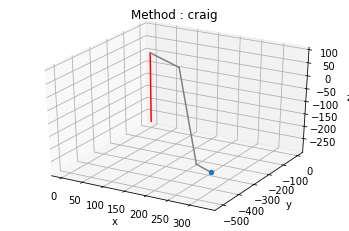

In [ ]:
theta_1 = np.random.randint(180)
theta_2 = np.random.randint(180)
theta_3 = np.random.randint(180)
theta_4 = np.random.randint(180)
theta_5 = np.random.randint(180)
theta_6 = np.random.randint(180)
base_point = [0, 0, -280]
tool_length = 100

print(f'Theta_1={theta_1}°, Theta_2={theta_2}°, Theta_3={theta_3}°, Theta_4={theta_4}°, Theta_5={theta_5}°, Theta_6={theta_6}°')

dh_table_std = np.array([
  [np.radians(theta_1)     , np.radians(90) , 0  , 0          ],
  [np.radians(theta_2 + 90), 0              , 340, 0          ],
  [np.radians(theta_3)     , np.radians(90) , 0  , 0          ],
  [np.radians(theta_4)     , np.radians(-90), 0  , 338        ],
  [np.radians(theta_5)     , np.radians(90) , 0  , 0          ],
  [np.radians(theta_6)     , 0              , 0  , tool_length]
], dtype=np.float64)
plotRobotArm(dh_table_std, 'std', base_point)

dh_table_craig = np.array([
    [np.radians(theta_1)      , 0              , 0  , 0  ],
    [np.radians(theta_2 + 90) , np.radians(90) , 0  , 0  ],
    [np.radians(theta_3)      , 0              , 340, 0  ],
    [np.radians(theta_4)      , np.radians(90) , 0  , 338],
    [np.radians(theta_5)      , np.radians(-90), 0  , 0  ],
    [np.radians(theta_6)      , np.radians(90) , 0  , 0  ]
], dtype=np.float64)
plotRobotArm(dh_table_craig, 'craig', base_point, np.array([0, 0, tool_length, 1]))